<a href="https://colab.research.google.com/github/aaronbbarclay/mine/blob/master/opencv_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
url = "https://www.sciencemag.org/sites/default/files/styles/inline__699w__no_aspect/public/bird_16x9_3.jpg?itok=7xz-mZ1c" 
!wget $url -O bird.jpg

--2019-06-01 04:34:23--  https://www.sciencemag.org/sites/default/files/styles/inline__699w__no_aspect/public/bird_16x9_3.jpg?itok=7xz-mZ1c
Resolving www.sciencemag.org (www.sciencemag.org)... 52.52.89.87, 54.183.243.54
Connecting to www.sciencemag.org (www.sciencemag.org)|52.52.89.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35880 (35K) [image/jpeg]
Saving to: ‘bird.jpg’

bird.jpg            100%[===================>]  35.04K  --.-KB/s    in 0.07s   

2019-06-01 04:34:24 (498 KB/s) - ‘bird.jpg’ saved [35880/35880]



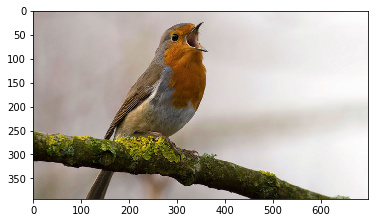

In [31]:


%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np


load = cv2.imread('bird.jpg')
img = cv2.cvtColor(load, cv2.COLOR_BGR2RGB)

# The underlying representation is a numpy array!

plt.imshow(img)





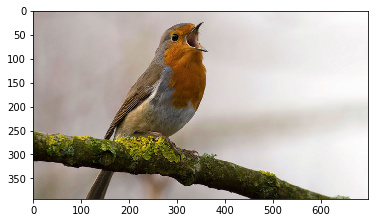

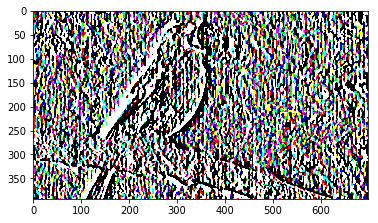

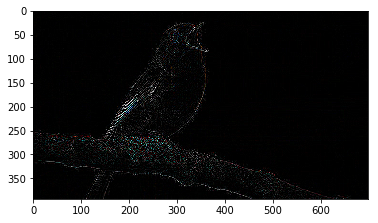

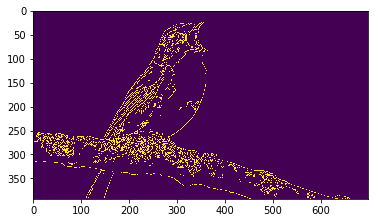

In [57]:

imgray = cv2.cvtColor(load, cv2.COLOR_BGR2GRAY)

flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
#print(flags)

ret, thresh = cv2.threshold(imgray, 125, 255, 0)
im2, contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

height, width = im2.shape

blank_image = np.zeros((height, width, 3), np.uint8)

edges = cv2.Canny(img, 100, 200,)

laplacian = cv2.Laplacian(load, cv2.CV_8U)
sobelx = cv2.Sobel(laplacian, cv2.CV_8U, 1, 0, ksize=15)
                          

plt.imshow(img)
plt.show()
plt.imshow(sobelx)
plt.show()
plt.imshow(laplacian)
plt.show()
plt.imshow(edges)
plt.show()

In [0]:
url1 = "https://www.imdb.com/title/tt0076759/mediaviewer/rm3263717120"
url2 = "https://i.pinimg.com/originals/34/2e/68/342e68f8f7a8e4aaec92bec59005b42c.jpg"
url3 = "https://www.closeup-shop.com/media/oart_0/oart_s/oart_48908/thumbs/711430_2113268.jpg"

!wget $url2 -O poster1.jpg
!wget $url3 -O poster3.jpg


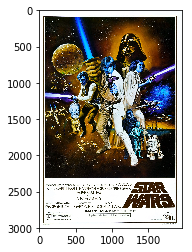

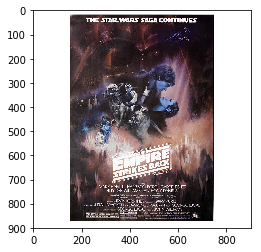

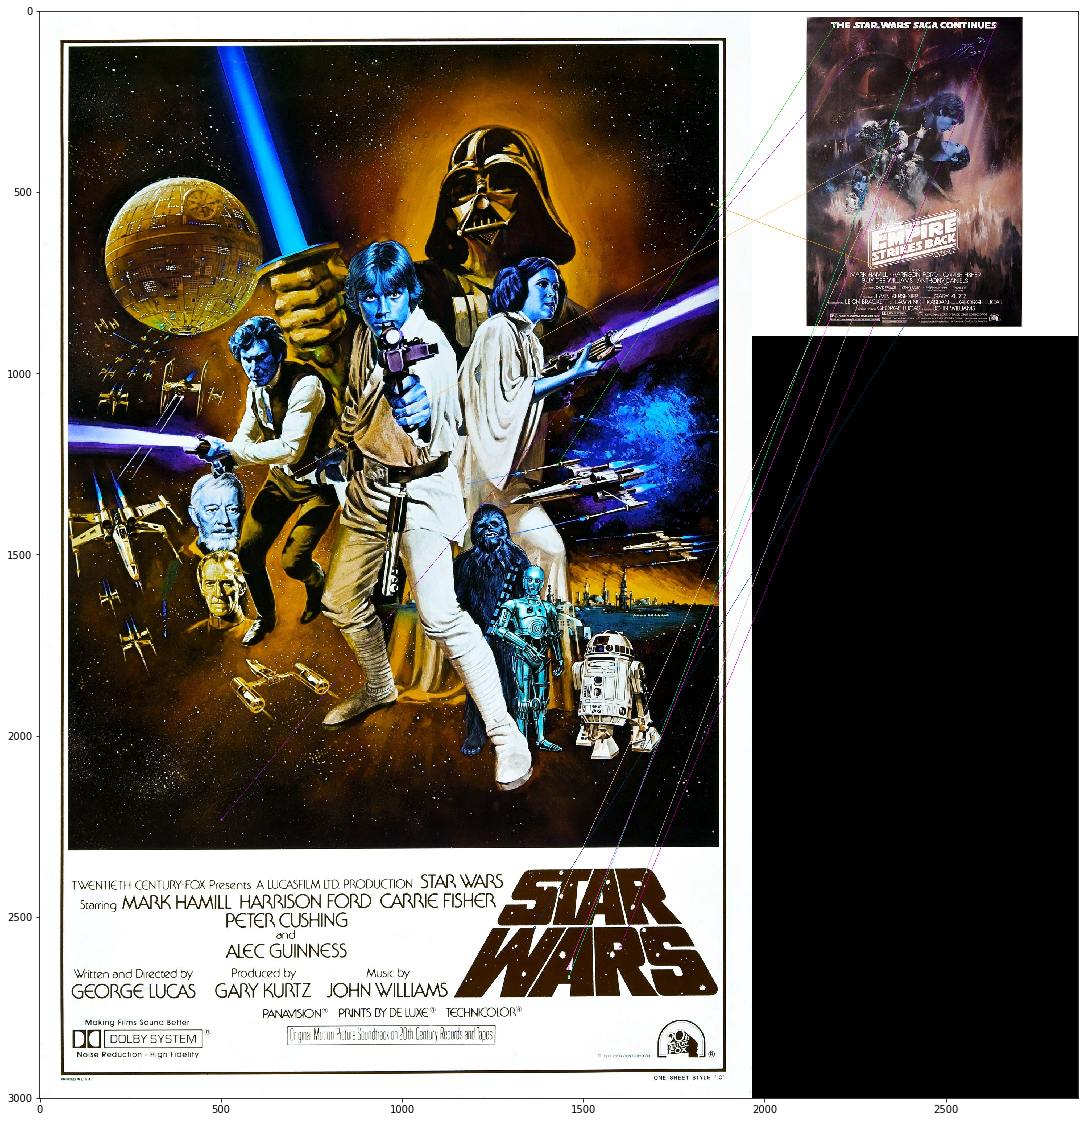

In [72]:

poster1 = cv2.imread('poster1.jpg')
poster3 = cv2.imread('poster3.jpg')


plt.imshow(poster1)
plt.show()
plt.imshow(poster3)
plt.show()


#img = cv2.cvtColor(load, cv2.COLOR_BGR2RGB)

orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(poster1, None)
kp3, des3 = orb.detectAndCompute(poster3, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

matches = bf.match(des1, des3)
matches = sorted(matches, key = lambda x:x.distance)


img3 = cv2.drawMatches(poster1, kp1, poster3, kp3, matches[:10], None, flags=2)

plt.figure(figsize=(20, 20))
plt.imshow(img3)
plt.show()



In [61]:
%ls

 bird.jpg      poster2.jpg   'the-very-first-_star-war_-poster-photo-u1?w=650'
 poster1.jpg   sample_data/


In [30]:
cv2.__version__

'3.4.3'